# Single experiments vs. batches of experiments

This notebook is a part of the series about using ProcessOptimizer to guide a gold
mining expedition. For an overview, go to the markdown file gold_mining.md

## What we learned last time

We define our `coordinates` and our `score()` function, and initialise a
ProcessOptimizer on the `coordinates`. We then do 10 cycles of asking for a place to
dig, sending Ms. Dixon's team to dig, and telling the ProcessOptimizer how much gold was
found. 

We dug at [12.75, 5.25] and found 2.7 mg gold.
We dug at [2.25, 14.25] and found 1.3 mg gold.
We dug at [8.25, 9.75] and found 2.6 mg gold.
We dug at [0.75, 12.75] and found 1.9 mg gold.
We dug at [11.25, 3.75] and found 2.8 mg gold.
We dug at [3.75, 8.25] and found 2.3 mg gold.
We dug at [14.25, 2.25] and found 1.4 mg gold.
We dug at [6.75, 11.25] and found 2.3 mg gold.
We dug at [5.25, 0.75] and found 3.0 mg gold.
We dug at [9.75, 6.75] and found 2.9 mg gold.


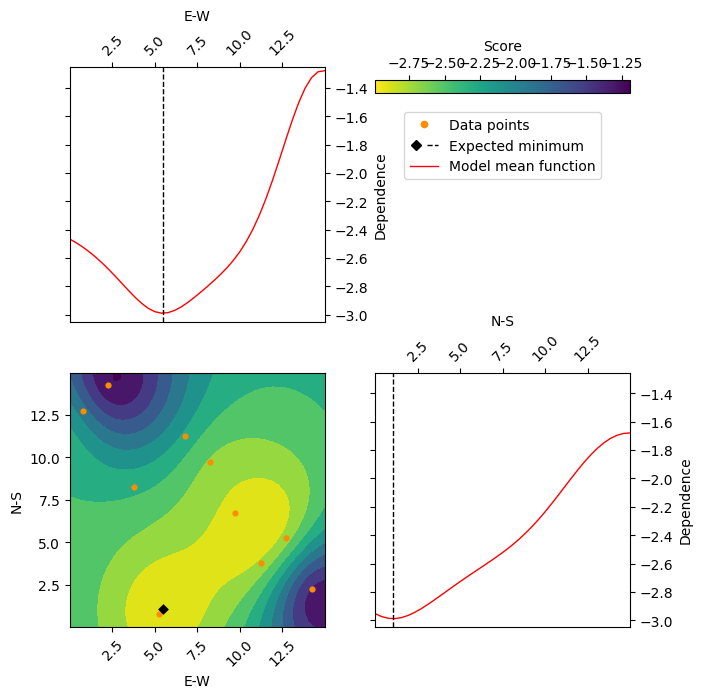

In [2]:
import numpy as np
import ProcessOptimizer

#Setting random seed to ensure reproducible behaviour
np.random.seed(42)

coordinates = [(0, 15.0),(0,15.0)]

def score(coordinates, verbose = True):
    """ Modified Branin-Hoo function. It has three minima.
    More details: <http://www.sfu.ca/~ssurjano/branin.html>
    """
    x = 10-coordinates[0]
    y = coordinates[1]
    gold_found = ((y - 1/8 * x ** 2 + 1.6 * x - 6) ** 2 + 10 * np.cos(x) - 299)/100
    if verbose:
        print(f"We dug at {coordinates} and found {-round(gold_found*10)/10} mg gold.")
    return gold_found

opt = ProcessOptimizer.Optimizer(dimensions=coordinates)
# For each of the first 10 positions
for index in range(10):
    # Find the place to dig
    new_dig_site = opt.ask()
    # Digging for gold
    gold_found = score(new_dig_site)
    # Telling the optimiser how uch gold we found
    result = opt.tell(new_dig_site, gold_found)
# plotting
ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"]);

## One experiment at a time

Last time, we sent Ms. Dixon's team out for one dig at a time.

In [5]:
# Finding new dig site.
new_dig_site=opt.ask()
# Digging and finding gold.
gold_found = score(new_dig_site)
# Telling ProcessOptimizer how much gold we found at the new dig site
opt.tell(new_dig_site,gold_found);

We dug at [12.352141245012993, 9.330314373985042] and found 3.0 mg gold.


But after talking to Mr. Dixon, we learn that the team spends a lot of time driving back and forth between the headquarters and the plot. So they would be much more efficient if they could get a list of, say, 5 sets of coordinates to dig at at a time. We can do this by setting the `n_points` parameter of the `opt.ask()` method: 

Going out on tour number 1
We dug at [7.044294340524093, 2.218283320150162] and found 3.1 mg gold.
We dug at [2.8444808882012893, 4.706212931958182] and found 2.8 mg gold.
We dug at [10.347577007591418, 13.694171262486638] and found 2.4 mg gold.
We dug at [1.3060876613647234, 7.233481729655637] and found 2.7 mg gold.
We dug at [4.861280698640729, 6.023384082346422] and found 2.7 mg gold.
Average amount of gold found in tour 1: 2.7411199788126637
Going out on tour number 2
We dug at [0.0, 0.0] and found 3.0 mg gold.
We dug at [5.762855863548236, 12.38959998211613] and found 1.8 mg gold.
We dug at [10.822108207354534, 7.966497004562313] and found 2.9 mg gold.
We dug at [1.8876666473893258, 10.317268709602137] and found 2.2 mg gold.
We dug at [11.820015407921753, 14.65480177912057] and found 2.7 mg gold.
Average amount of gold found in tour 2: 2.539166704877086
Going out on tour number 3
We dug at [0.0, 3.5699747612372974] and found 3.1 mg gold.
We dug at [8.882747853808171, 13.0764007226

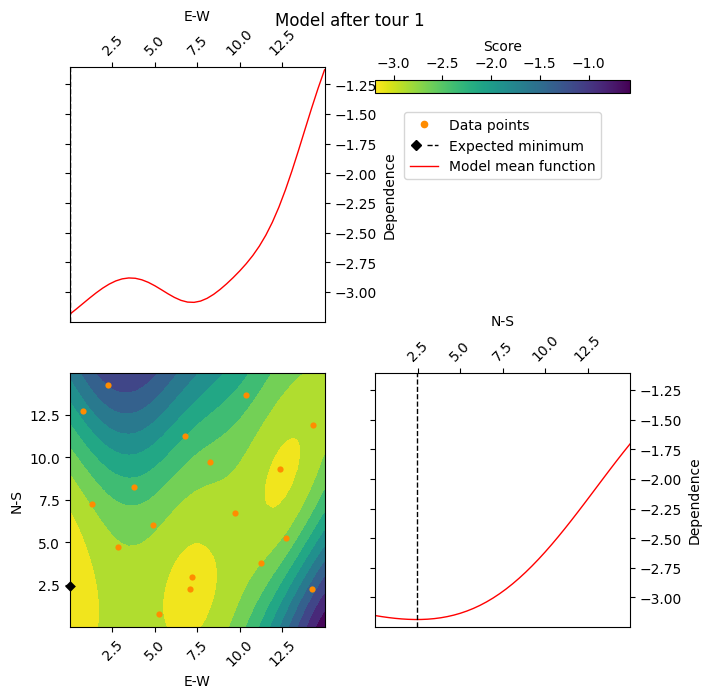

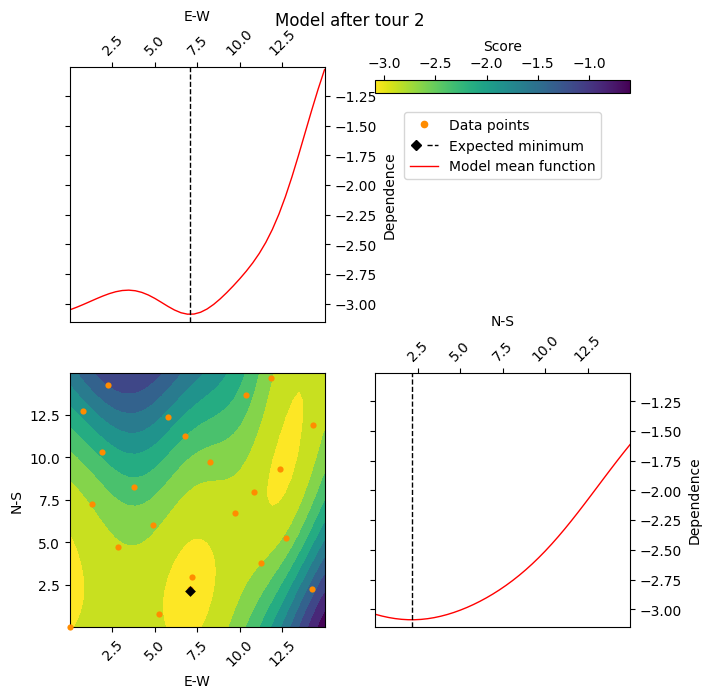

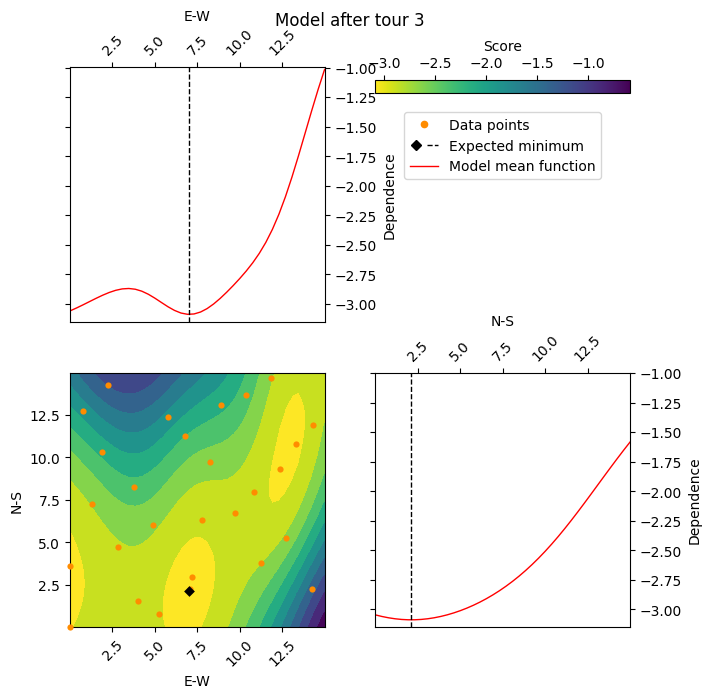

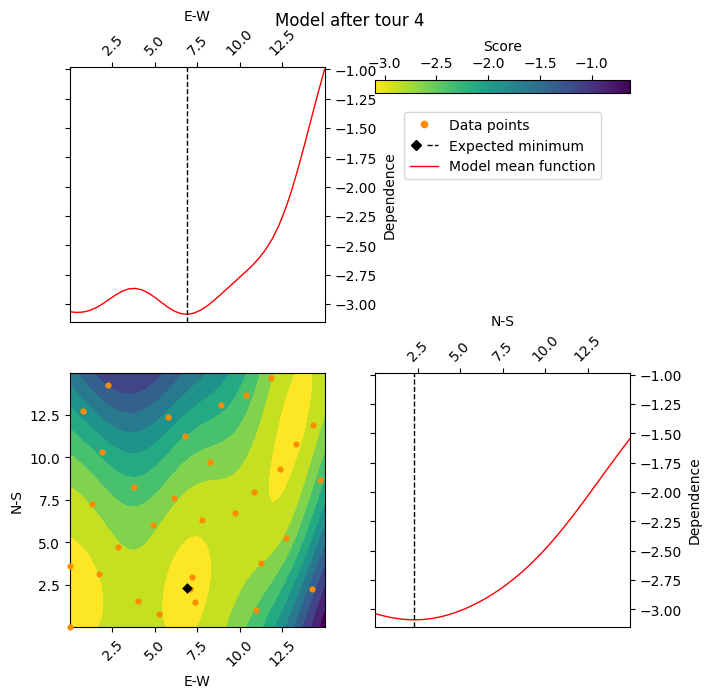

In [6]:
for tour_number in range(4):
    print(f"Going out on tour number {tour_number+1}")
    # Finding five new spots to dig at
    new_position_list = opt.ask(n_points=5)
    # Starting the list of results of digs.
    gold_found = []
    for dig_number in range(len(new_position_list)):
        # Fishing out the next position
        dig_position = new_position_list[dig_number]
        # Digging and adding the result to the list of results of digs
        gold_found.append(score(dig_position))
    print(f"Average amount of gold found in tour {tour_number+1}: {-np.mean(gold_found)} mg.")
    # Telling the ProcessOptimizer about the result of the five digs
    opt.tell(new_position_list, gold_found)
    ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"],title=f"Model after tour {tour_number+1}")

## Strategies

When getting more than one point, we can't use the standard Bayesian Optimisation
strategy, as we don't know the value of the of the first new points when selecting the
rest of the new points. There are different strategies to use for how to select the rest
of the points. The strategy is controlled by the `strategy` parameter of `opt.ask()`
* Steinerberger sampling tries to spread the remaining dig sites as much as possible,
    see https://arxiv.org/abs/1902.03269. The default is to use Steinerberger sampling
    after the first new point.
* We can lie to the model about the values in the first new points. We can either tell
    it that they have the same value as the minimum, mean or maximum of the observed
    scores. This is done by setting the `strategy` parameter to `cl_min`, `cl_mean`, or
    `cl_max`, respectively.
Let's try the last three strategies:

Trying strategy cl_min
We dug at [7.208772315460932, 2.943427696591651] and found 3.1 mg gold.
We dug at [5.928223350550833, 1.5001691192410886] and found 3.0 mg gold.
We dug at [15.01, 15.01] and found 2.9 mg gold.
We dug at [13.011447604026978, 10.903871559814133] and found 3.1 mg gold.
We dug at [12.115390286228818, 8.159762135856495] and found 3.0 mg gold.
We dug at [0.0, 0.0] and found 3.0 mg gold.
We dug at [0.0, 1.942574536594986] and found 3.1 mg gold.
Avergae amount of gold found with strategy cl_min: 3.022943853432623
Trying strategy cl_mean
We dug at [7.208773219305934, 2.943426115678961] and found 3.1 mg gold.
We dug at [11.218537752116001, 6.137472064761765] and found 2.9 mg gold.
We dug at [4.7879186603068, 0.28449886194563956] and found 2.9 mg gold.
We dug at [8.98452312111382, 6.013204257251682] and found 2.9 mg gold.
We dug at [10.557655566565893, 9.81881722842426] and found 2.8 mg gold.
We dug at [9.78496389318206, 1.6812297935514484] and found 2.7 mg gold.
We dug at 

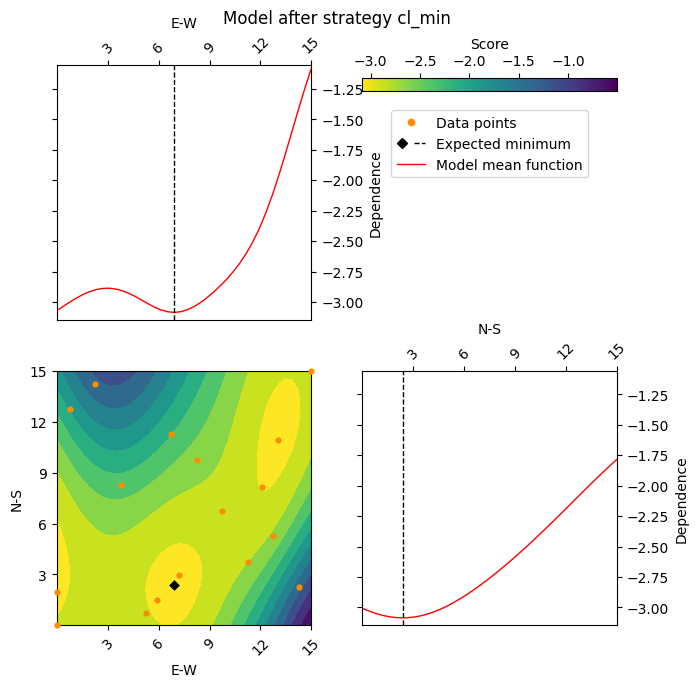

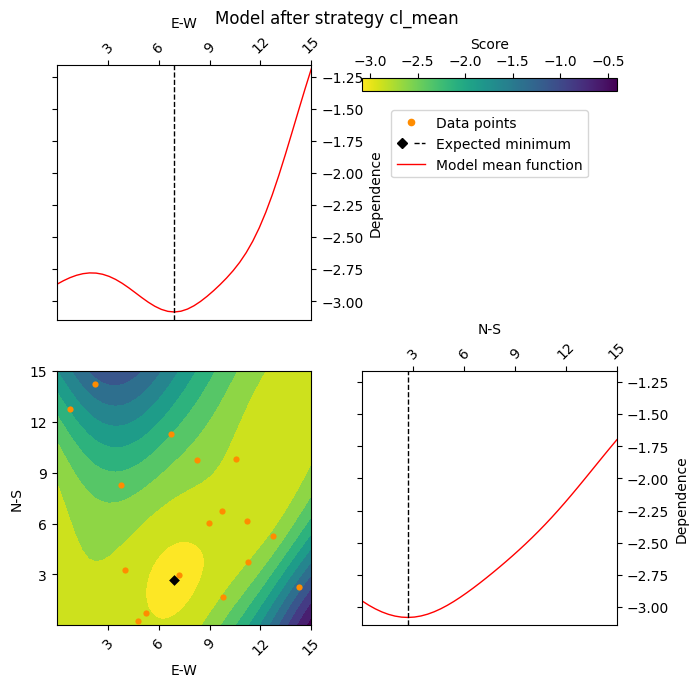

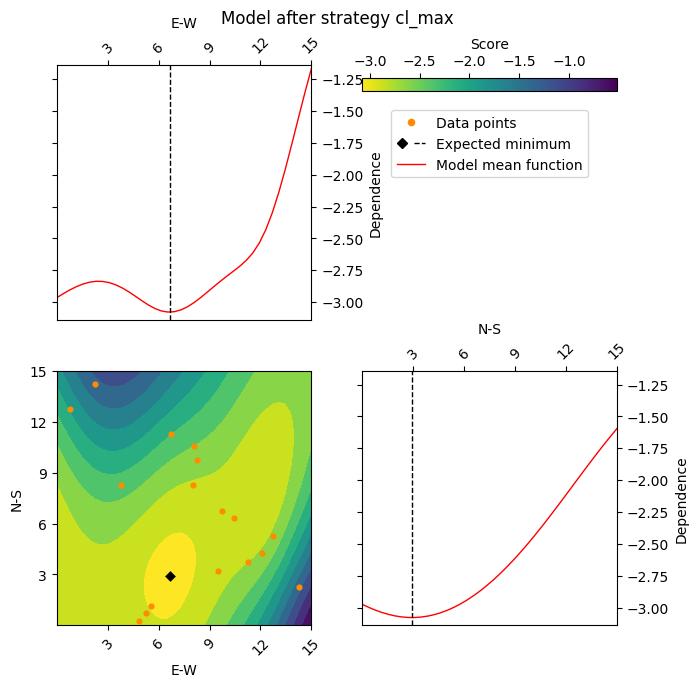

In [56]:
strategy_list = ["cl_min", "cl_mean","cl_max"]
for strategy in strategy_list:
    opt = ProcessOptimizer.optimizer.optimizer.Optimizer(dimensions=space)
    # Telling the optimiser how much gold we found at the first 10 points
    result = opt.tell(initial_points, initial_gold_found)
    # Starting the list of results of digs.
    gold_found = []
    print(f"Trying strategy {strategy}")
    # Asking the ProcessOptimizer for 7 new points with the chosen strategy
    new_position_list = opt.ask(n_points = 7, strategy = strategy)
    for dig_number in range(len(new_position_list)):
        # Fishing out the next position
        dig_position = new_position_list[dig_number]
        # Digging and adding the result to the list of results of digs
        gold_found.append(score(dig_position))
        # Telling the ProcessOptimizer about the result of the five digs
    print(f"Average amount of gold found with strategy {strategy}: {-np.mean(gold_found)}")
    opt.tell(new_position_list, gold_found)
    ProcessOptimizer.plot_objective(result=result,pars="expected_minimum",dimensions = ["E-W","N-S"],title=f"Model after strategy {strategy}")